In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import plotly.express as px #graphing library for python

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df=pd.read_csv("/content/gdrive/MyDrive/GlobalTemperatures.csv")

In [4]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['dt'][0].split('-')[0]

'1750'

In [6]:
def getyear(dateyear):
  return dateyear.split('-')[0]

In [7]:
df['Year']=df['dt'].apply(getyear)

# Splitting date into years

In [8]:
df.tail(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year
3182,2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061,2015
3183,2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061,2015
3184,2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058,2015
3185,2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057,2015
3186,2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058,2015
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062,2015


In [9]:
group=df.groupby('Year').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [10]:
group.head()

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [11]:
group.columns

Index(['Year', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty'], dtype='object')

In [12]:
# Computing uncertainities 
group['Uncertinity_top']= group['LandAverageTemperature'] + group['LandAverageTemperatureUncertainty']

In [14]:
group['Uncertinity_bottom']= group['LandAverageTemperature'] - group['LandAverageTemperatureUncertainty']

In [15]:
group.tail(5)

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertinity_top,Uncertinity_bottom
261,2011,9.516000,0.082000,9.598000,9.434000
262,2012,9.507333,0.083417,9.590750,9.423917
263,2013,9.606500,0.097667,9.704167,9.508833
264,2014,9.570667,0.090167,9.660833,9.480500
265,2015,9.831000,0.092167,9.923167,9.738833


In [16]:
group.columns

Index(['Year', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertinity_top', 'Uncertinity_bottom'],
      dtype='object')

In [17]:
group.head()

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertinity_top,Uncertinity_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [18]:
import plotly.graph_objs as go
fig = go.Figure()
for col in ['Uncertinity_top','LandAverageTemperature','Uncertinity_bottom']:
    fig.add_trace(go.Line(x=group.Year, y=group[col],name=col))
fig.show()

### This chart infers that the average global temperature has risen since 1990. Hence proving the existence of global warming.

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Seasonal Analysis

In [19]:
df['dt'].describe

<bound method NDFrame.describe of 0       1750-01-01
1       1750-02-01
2       1750-03-01
3       1750-04-01
4       1750-05-01
           ...    
3187    2015-08-01
3188    2015-09-01
3189    2015-10-01
3190    2015-11-01
3191    2015-12-01
Name: dt, Length: 3192, dtype: object>

In [20]:
##converting dt(object type to date time format)

df['dt']=pd.to_datetime(df['dt'])

In [21]:
df['dt'].describe

<bound method NDFrame.describe of 0      1750-01-01
1      1750-02-01
2      1750-03-01
3      1750-04-01
4      1750-05-01
          ...    
3187   2015-08-01
3188   2015-09-01
3189   2015-10-01
3190   2015-11-01
3191   2015-12-01
Name: dt, Length: 3192, dtype: datetime64[ns]>

In [22]:
df['month']=df['dt'].dt.month

In [23]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [24]:
def describe_season(month):
  if(month>3 and month<=5):
    return 'Spring'
  elif(month>6 and month<=8):
    return 'Summer'
  elif(month>9 and month<=11):
    return 'Autumn'
  else:
    return 'Winter'

In [25]:
df['Season']=df['month'].apply(describe_season)

In [26]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,month,Season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,Winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,Winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,Winter
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,Spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,Spring


In [27]:
season_spring=[]
season_summer=[]
season_autumn=[]
season_winter=[]

In [28]:
years=df['Year'].unique()
years

array(['1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765',
       '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773',
       '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781',
       '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797',
       '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

In [29]:
for year in years:
  df2= df[df['Year']==year]
  season_spring.append(df2[df['Season']=='Spring']['LandAverageTemperature'].mean())
  season_summer.append(df2[df['Season']=='Summer']['LandAverageTemperature'].mean())
  season_autumn.append(df2[df['Season']=='Autumn']['LandAverageTemperature'].mean())
  season_winter.append(df2[df['Season']=='Winter']['LandAverageTemperature'].mean())


  # Mean temperature of seasons

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [30]:
print(len(season_autumn))
print(len(years))

266
266


In [31]:
df_new=pd.DataFrame()

In [32]:
df_new['Year']=years
df_new['Spring_Temp']=season_spring
df_new['Summer_Temp']=season_summer
df_new['Autumn_Temp']=season_autumn
df_new['Winter_Temp']=season_winter

In [33]:
df_new

,Year,Spring_Temp,Summer_Temp,Autumn_Temp,Winter_Temp
0,1750,10.0315,15.3090,6.3670,6.477500
1,1751,7.6700,14.4050,NaN,6.751600
2,1752,8.2650,NaN,7.5870,3.746667
3,1753,10.2290,14.6200,7.1575,6.107333
4,1754,11.7730,14.1185,7.8715,5.684333
...,...,...,...,...,...
261,2011,10.7345,15.2470,8.5830,7.510500
262,2012,11.1330,14.8980,8.7920,7.407000
263,2013,10.6195,14.8725,8.8400,7.769000
264,2014,11.0855,14.8740,8.5215,7.647667


In [34]:
df_new.columns

Index(['Year', 'Spring_Temp', 'Summer_Temp', 'Autumn_Temp', 'Winter_Temp'], dtype='object')

In [35]:
import plotly.graph_objs as go
fig= go.Figure(layout=go.Layout(
        title=go.layout.Title(text="Seasonal Temperature (1750-2015)")))
for col in ['Spring_Temp', 'Summer_Temp', 'Autumn_Temp', 'Winter_Temp']:
    fig.add_trace(go.Line(x=df_new.Year, y=df_new[col],name=col))
    
fig.show()
## Increase in temperature in all seasons can be observed

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




##Temperature Trend In India

In [36]:
df_country=pd.read_csv("/content/gdrive/MyDrive/GlobalLandTemperaturesByCountry.csv")
df_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [37]:
df_country.isnull().sum()
df_country.dropna(inplace=True)
df_country.isnull().sum()
df_country.shape
df_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [38]:
df_country.shape

(544811, 4)

In [39]:
df_country['Year']=df_country['dt'].apply(getyear)

## getyear function is already defined once @line 10 

In [40]:
df_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


In [41]:
India = ['India']
India_temp= df_country[df_country['Country'].isin(India)]

In [42]:
India_temp
India_temp.shape

(2508, 5)

In [43]:
avgtemp_india=India_temp.groupby('Year').agg({'AverageTemperature':'mean'}).reset_index()
avgtemp_india

,Year,AverageTemperature
0,1796,23.675250
1,1797,24.839900
2,1798,23.273300
3,1799,23.949417
4,1800,23.911917
...,...,...
206,2009,25.146667
207,2010,25.050833
208,2011,24.415583
209,2012,24.640833


In [44]:
px.line(avgtemp_india,x='Year',y='AverageTemperature',title="Average Temperature Of India (1796-2013)")

In [45]:
df_state=pd.read_csv("/content/gdrive/MyDrive/GlobalLandTemperaturesByState.csv")
df_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [46]:
df_state=df_state[df_state['Country']=="India"]

In [47]:
df_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
24709,1796-01-01,26.534,1.904,Andaman And Nicobar,India
24710,1796-02-01,26.294,1.122,Andaman And Nicobar,India
24711,1796-03-01,26.180,1.959,Andaman And Nicobar,India
24712,1796-04-01,27.942,1.281,Andaman And Nicobar,India
24713,1796-05-01,28.651,1.119,Andaman And Nicobar,India


In [48]:
df_state.dropna(inplace=True)

In [49]:
df_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
24709,1796-01-01,26.534,1.904,Andaman And Nicobar,India
24710,1796-02-01,26.294,1.122,Andaman And Nicobar,India
24711,1796-03-01,26.180,1.959,Andaman And Nicobar,India
24712,1796-04-01,27.942,1.281,Andaman And Nicobar,India
24713,1796-05-01,28.651,1.119,Andaman And Nicobar,India


In [50]:
df_state['State'].nunique()
df_state['State'].unique()

array(['Andaman And Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra And Nagar Haveli', 'Daman And Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal'], dtype=object)

In [51]:
df2_state=df_state[['dt','AverageTemperature','State']]

In [52]:
df2_state

,dt,AverageTemperature,State
24709,1796-01-01,26.534,Andaman And Nicobar
24710,1796-02-01,26.294,Andaman And Nicobar
24711,1796-03-01,26.180,Andaman And Nicobar
24712,1796-04-01,27.942,Andaman And Nicobar
24713,1796-05-01,28.651,Andaman And Nicobar
...,...,...,...
615156,2013-04-01,28.707,West Bengal
615157,2013-05-01,29.694,West Bengal
615158,2013-06-01,29.628,West Bengal
615159,2013-07-01,29.115,West Bengal


In [53]:
State_India=df2_state.groupby('State')['AverageTemperature'].mean().reset_index()

In [54]:
State_India['State'].unique()

array(['Andaman And Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra And Nagar Haveli', 'Daman And Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal'], dtype=object)

In [55]:
State_India['AverageTemperature']

0     27.231677
1     27.090003
2     13.795670
3     21.875561
4     24.486945
5     13.381667
6     25.589014
7     24.969918
8     26.274003
9     25.165861
10    25.755925
11    26.296188
12    24.236843
13     9.098241
14     3.204062
15    24.929374
16    25.622263
17    26.319626
18    25.261987
19    25.933388
20    21.186684
21    23.438018
22    23.315388
23    21.398759
24    25.927605
25    27.266897
26    23.338020
27    25.725266
28     3.149101
29    26.667812
30    24.750007
31    24.645434
32    14.697141
33    24.915779
Name: AverageTemperature, dtype: float64

In [56]:
## Plotting Data on Map 

In [57]:
!pip install opencage

     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 3.2MB 14.3MB/s 


In [58]:
from opencage.geocoder import OpenCageGeocode

In [59]:
key="fad7980def1f41c5894dfbd5bc3a8352"

In [60]:
geocoder=OpenCageGeocode(key)

In [61]:
location='New Delhi,India'
delhi=geocoder.geocode(location)
delhi

[{'annotations': {'DMS': {'lat': "28° 36' 50.02344'' N",
    'lng': "77° 12' 32.42052'' E"},
   'MGRS': '43RGM1598067204',
   'Maidenhead': 'ML88oo57bi',
   'Mercator': {'x': 8594867.199, 'y': 3306136.162},
   'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=2763541#map=16/28.61390/77.20901',
    'note_url': 'https://www.openstreetmap.org/note/new#map=16/28.61390/77.20901&layers=N',
    'url': 'https://www.openstreetmap.org/?mlat=28.61390&mlon=77.20901#map=16/28.61390/77.20901'},
   'UN_M49': {'regions': {'ASIA': '142',
     'IN': '356',
     'SOUTHERN_ASIA': '034',
     'WORLD': '001'},
    'statistical_groupings': ['LEDC']},
   'callingcode': 91,
   'currency': {'alternate_symbols': ['Rs', '৳', '૱', '௹', 'रु', '₨'],
    'decimal_mark': '.',
    'html_entity': '&#x20b9;',
    'iso_code': 'INR',
    'iso_numeric': '356',
    'name': 'Indian Rupee',
    'smallest_denomination': 50,
    'subunit': 'Paisa',
    'subunit_to_unit': 100,
    'symbol': '₹',
    'symbol_first':

In [62]:
delhi[0]['geometry']['lat']

28.6138954

In [63]:
delhi[0]['geometry']['lng']

77.2090057

In [64]:
lat=[]
lon=[]

In [65]:
for state in State_India['State']:
  location=geocoder.geocode(state)
  latitude=location[0]['geometry']['lat']
  longitude=location[0]['geometry']['lng']
  lat.append(latitude)
  lon.append(longitude)

In [66]:
lon

[93.8110815,
 80.1863809,
 94.5921326,
 93.2551303,
 85.906508,
 76.7797143,
 81.8406351,
 73.0044988,
 72.8637629,
 77.2219388,
 74.0855134,
 71.7452633,
 76.0,
 77.3493205,
 75.1629584,
 85.2557301,
 75.7223521,
 76.5120396,
 77.5340719,
 75.6741579,
 93.9229386,
 91.2999102,
 92.8687612,
 94.5884911,
 84.6897321,
 79.8069488,
 75.5004841,
 73.7684549,
 88.4541364,
 78.3665347,
 91.7025091,
 80.859666,
 79.089691,
 87.6855882]

In [67]:
State_India['latitude']=lat
State_India['longitude']=lon


In [68]:
State_India.head()

,State,AverageTemperature,latitude,longitude
0,Andaman And Nicobar,27.231677,7.000017,93.811082
1,Andhra Pradesh,27.090003,15.924091,80.186381
2,Arunachal Pradesh,13.795670,28.093770,94.592133
3,Assam,21.875561,26.407384,93.255130
4,Bihar,24.486945,25.644085,85.906508


In [69]:
State_India.count()

State                 34
AverageTemperature    34
latitude              34
longitude             34
dtype: int64

In [70]:
import folium

In [71]:
from folium.plugins import HeatMap

In [72]:
basemap=folium.Map()

In [ ]:
# HeatMap(State_India[['latitude','longitude','AverageTemperature']]).add_to(basemap)
# basemap

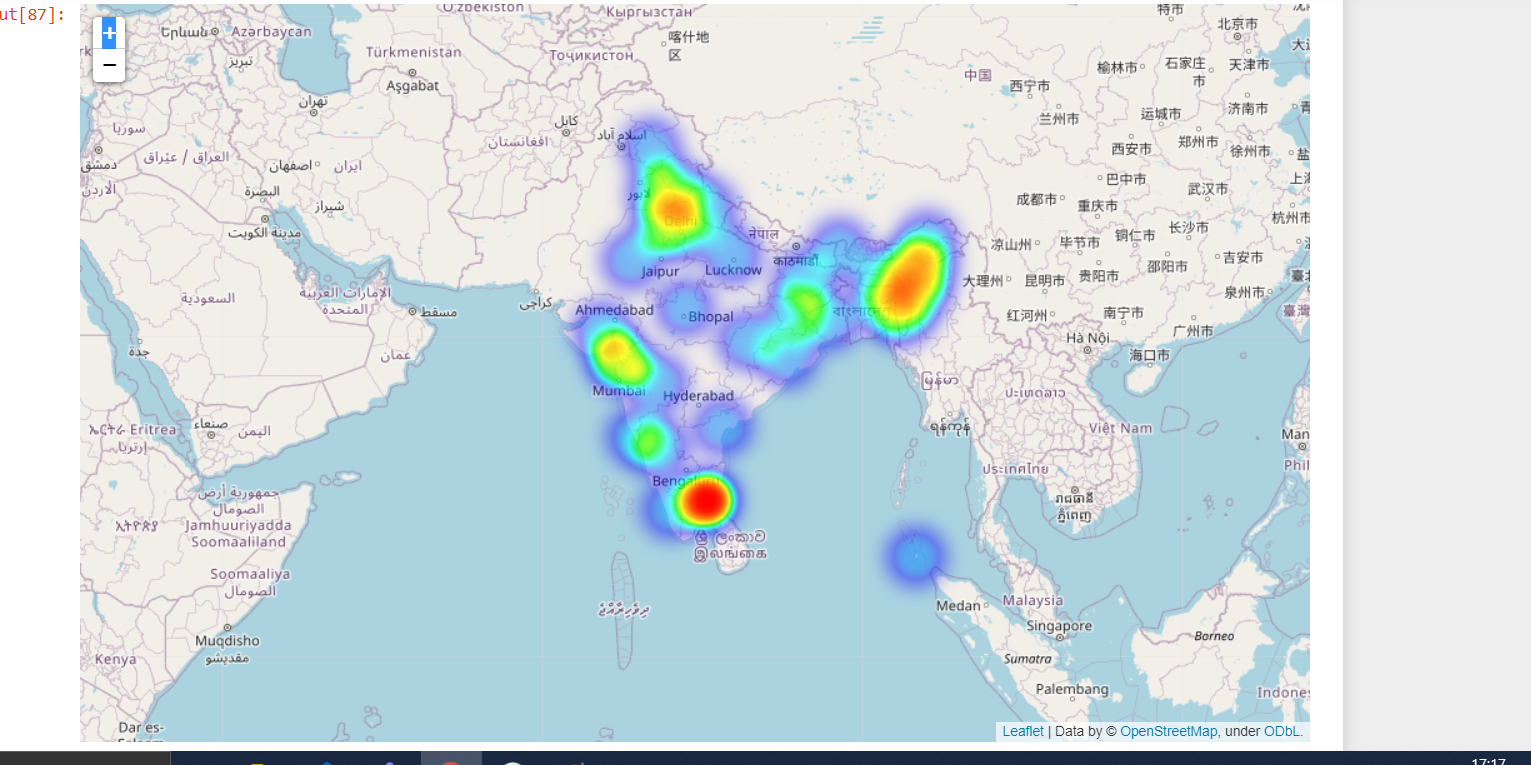

In [289]:
# Colab was not able to create the Heatmap. Hence, output from jupyter notebook

from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/Screenshot 2021-05-09 171729.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)


In [74]:
df_state.count()

dt                               81620
AverageTemperature               81620
AverageTemperatureUncertainty    81620
State                            81620
Country                          81620
dtype: int64

In [75]:
df_state['dt']=pd.to_datetime(df_state['dt'])

In [76]:
df_state['dt'].head()

24709   1796-01-01
24710   1796-02-01
24711   1796-03-01
24712   1796-04-01
24713   1796-05-01
Name: dt, dtype: datetime64[ns]

In [77]:
df_state['month']=df_state['dt'].dt.month

In [78]:
df_state['month'].isnull().sum()

0

In [79]:
df_state['month'].head()

24709    1
24710    2
24711    3
24712    4
24713    5
Name: month, dtype: int64

In [80]:
state_temp=pd.DataFrame
state_temp=df_state.groupby(['month','State'])['AverageTemperature'].mean().to_frame().reset_index()

In [81]:
state_temp['month']

0       1
1       1
2       1
3       1
4       1
       ..
403    12
404    12
405    12
406    12
407    12
Name: month, Length: 408, dtype: int64

In [82]:
state_temp['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [83]:
data_state=state_temp.merge(State_India,on=['State'])

In [84]:
data_state.head()

,month,State,AverageTemperature_x,AverageTemperature_y,latitude,longitude
0,1,Andaman And Nicobar,26.303175,27.231677,7.000017,93.811082
1,2,Andaman And Nicobar,26.425453,27.231677,7.000017,93.811082
2,3,Andaman And Nicobar,27.397613,27.231677,7.000017,93.811082
3,4,Andaman And Nicobar,28.340852,27.231677,7.000017,93.811082
4,5,Andaman And Nicobar,28.328445,27.231677,7.000017,93.811082


In [85]:
data_state.columns

Index(['month', 'State', 'AverageTemperature_x', 'AverageTemperature_y',
       'latitude', 'longitude'],
      dtype='object')

In [86]:
data_state=data_state[['month','State', 'AverageTemperature_x','latitude','longitude']]
data_state

,month,State,AverageTemperature_x,latitude,longitude
0,1,Andaman And Nicobar,26.303175,7.000017,93.811082
1,2,Andaman And Nicobar,26.425453,7.000017,93.811082
2,3,Andaman And Nicobar,27.397613,7.000017,93.811082
3,4,Andaman And Nicobar,28.340852,7.000017,93.811082
4,5,Andaman And Nicobar,28.328445,7.000017,93.811082
...,...,...,...,...,...
403,8,West Bengal,27.936377,22.996495,87.685588
404,9,West Bengal,27.558730,22.996495,87.685588
405,10,West Bengal,25.720858,22.996495,87.685588
406,11,West Bengal,22.074891,22.996495,87.685588


In [87]:
duplicate = data_state[data_state.duplicated()]
duplicate

# Checking for any duplicate row

,month,State,AverageTemperature_x,latitude,longitude


In [88]:
dict={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
data_state['month']=data_state['month'].map(dict)
data_state['month'] 

0        January
1       February
2          March
3          April
4            May
         ...    
403       August
404    September
405      October
406     November
407     December
Name: month, Length: 408, dtype: object

In [89]:
import plotly.graph_objs as go

In [90]:
heatmap_state=[go.Heatmap(x=data_state['month'], y=data_state['State'], z=data_state['AverageTemperature_x'])]

In [91]:
layout=go.Layout(title='Average Temperature of States Of India Around The Year')

In [92]:
go.Figure(data=heatmap_state,layout=layout)

In [93]:
# # data_state['latitude'].astype(str)
# # data_state['longitude'].astype(s
# data_state.astype(float)
# # data_state.isnull().sum()

In [94]:
for id,row in data_state.iterrows():
  # popup = folium.Popup(row['AverageTemperature_x'])

  folium.Marker(location=[row['latitude'],row['longitude']]).add_to(basemap)

basemap

##Temperature Prediction of States of India


 

In [95]:
df_cities=pd.read_csv("/content/gdrive/MyDrive/GlobalLandTemperaturesByCity.csv")

In [96]:
df_cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [97]:
india_city=df_cities[df_cities['Country']=="India"]

In [98]:
india_city.count()

dt                               1014906
AverageTemperature                960548
AverageTemperatureUncertainty     960548
City                             1014906
Country                          1014906
Latitude                         1014906
Longitude                        1014906
dtype: int64

In [99]:
india_city['AverageTemperature'].isnull().sum()

54358

In [100]:
india_city.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
india_city.count()
india_city['City'].unique()

array(['Abohar', 'Achalpur', 'Adilabad', 'Adoni', 'Agartala', 'Agra',
       'Ahmadabad', 'Ahmadnagar', 'Aizawl', 'Ajmer', 'Akola', 'Alandur',
       'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar', 'Ambala',
       'Ambarnath', 'Ambattur', 'Ambur', 'Amravati', 'Amritsar', 'Amroha',
       'Anand', 'Anantapur', 'Ara', 'Asansol', 'Aurangabad', 'Avadi',
       'Azamgarh', 'Badlapur', 'Bagaha', 'Bahadurgarh', 'Baharampur',
       'Bahraich', 'Baidyabati', 'Baleshwar', 'Ballia', 'Bally',
       'Balurghat', 'Banda', 'Bangalore', 'Bangaon', 'Bankura',
       'Bansbaria', 'Barakpur', 'Baranagar', 'Barasat', 'Barddhaman',
       'Bareli', 'Baripada', 'Barnala', 'Barsi', 'Basirhat', 'Basti',
       'Batala', 'Beawar', 'Begusarai', 'Belgaum', 'Bellary', 'Bettiah',
       'Bhadravati', 'Bhadreswar', 'Bhagalpur', 'Bharatpur', 'Bharuch',
       'Bhatpara', 'Bhavnagar', 'Bhilai', 'Bhilwara', 'Bhimavaram',
       'Bhind', 'Bhiwandi', 'Bhiwani', 'Bhopal', 'Bhubaneswar', 'Bhuj',
       'Bhusawal', 'Bid',

In [102]:
##preparing data for 3 major cities

m_cities=['Delhi','Bombay','Bangalore']

In [103]:
data=india_city[india_city['City'].isin(m_cities)]

In [104]:
data=data[['dt','AverageTemperature']]

In [105]:
data.columns=['Date','Temperature']
data.head()

,Date,Temperature
630113,1796-01-01,22.672
630114,1796-02-01,24.420
630115,1796-03-01,26.092
630116,1796-04-01,27.687
630117,1796-05-01,27.619


In [106]:
data['Date']=pd.to_datetime(data['Date'])

In [107]:
data.set_index('Date',inplace=True)

In [108]:
data.head()

,Temperature
Date,
1796-01-01,22.672
1796-02-01,24.420
1796-03-01,26.092
1796-04-01,27.687
1796-05-01,27.619


 Checking The Stationarity of the Data

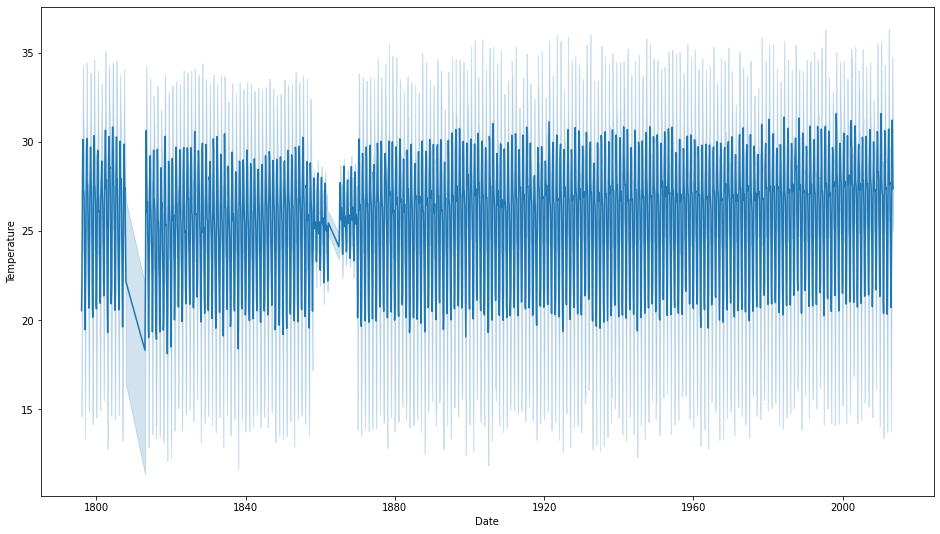

In [109]:
# Testing Stationarity by visualizing data

from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
sb.lineplot(x=data.index,y=data['Temperature'])

In [220]:
# Testing Stationarity of Data by applying dickey fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(data['Temperature'])

(-3.4741589348280826,
 0.00867608450159372,
 36,
 7373,
 {'1%': -3.43123723425287,
  '10%': -2.5669787048670383,
  '5%': -2.861932089379355},
 19503.766154609628)

In [221]:
dataf=pd.DataFrame()
dataf=data.copy()
dataf.head()

,Temperature,Month,Year
Date,,,
1796-01-01,22.672,1,1796
1796-02-01,24.420,2,1796
1796-03-01,26.092,3,1796
1796-04-01,27.687,4,1796
1796-05-01,27.619,5,1796


In [222]:
dataf['first_shift'] = data.Temperature-data.Temperature.shift(12)

In [223]:
from statsmodels.tsa.stattools import adfuller
Test=adfuller(dataf['first_shift'].dropna())
if(Test[1]<0.05):
  print(Test)
  print("Stationary")

(-18.358508196587373, 2.2295483760832197e-30, 36, 7361, {'1%': -3.431238681138794, '5%': -2.8619327286961758, '10%': -2.5669790451848606}, 20044.52893492934)
Stationary


In [224]:
#As p value <=0.05, hence rejecting the null hypothesis, which means data is stationary

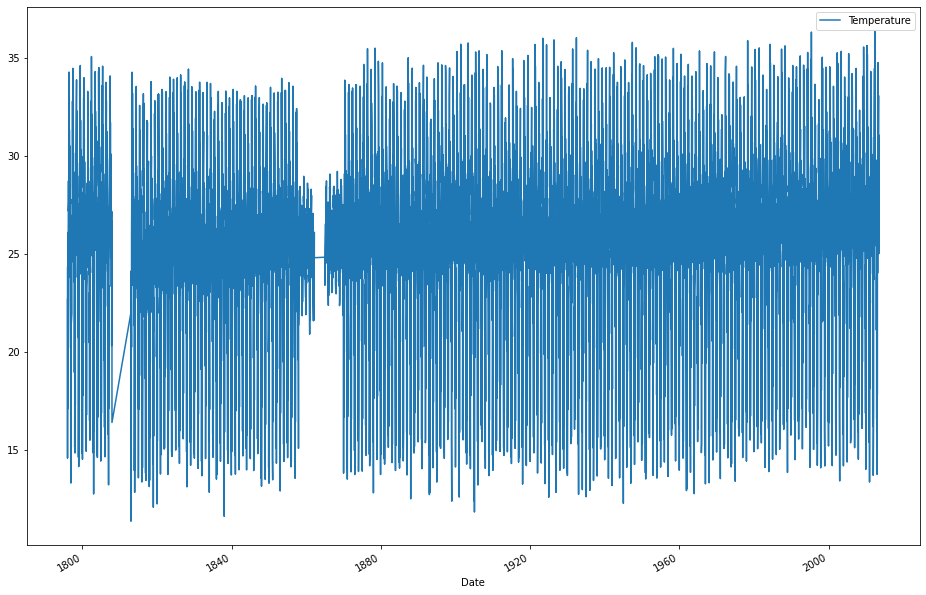

In [226]:
data[['Temperature']].plot(figsize=(16,11))
#Before Shifting

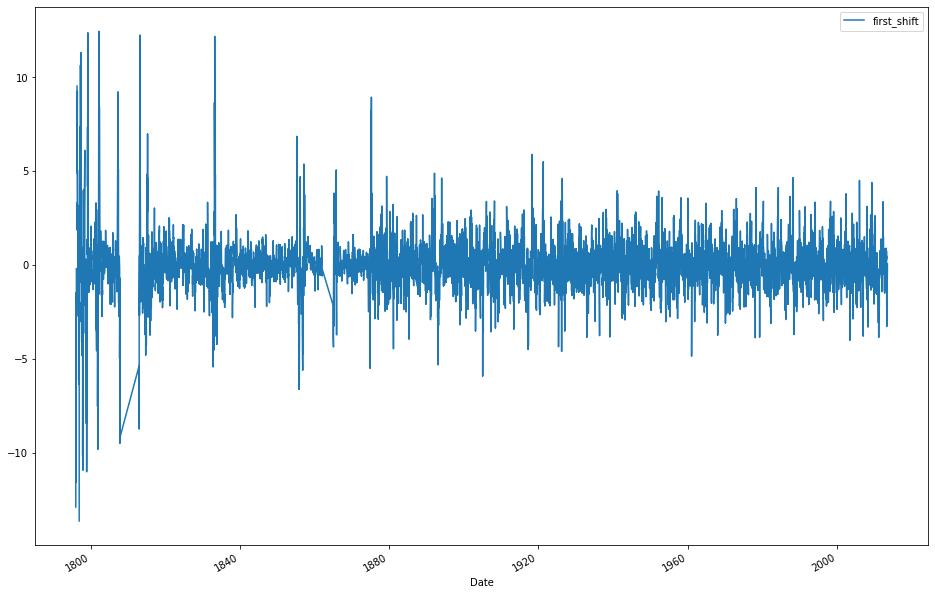

In [227]:
dataf[['first_shift']].plot(figsize=(16,11))

#After Shifting

In [228]:
dataf.dropna(inplace=True)

In [229]:
dataf

,Temperature,Month,Year,first_shift
Date,,,,
1797-03-01,26.766,3,1797,4.094
1797-04-01,27.448,4,1797,3.028
1797-05-01,27.554,5,1797,1.462
1797-06-01,26.768,6,1797,-0.919
1797-07-01,24.588,7,1797,-3.031
...,...,...,...,...
2013-04-01,29.304,4,2013,-0.037
2013-05-01,34.746,5,2013,0.298
2013-06-01,33.066,6,2013,-3.273


Analyzing Trends in Data 

In [230]:
data['Month']=data.index.month
data['Year']=data.index.year
data.head()

,Temperature,Month,Year
Date,,,
1796-01-01,22.672,1,1796
1796-02-01,24.420,2,1796
1796-03-01,26.092,3,1796
1796-04-01,27.687,4,1796
1796-05-01,27.619,5,1796


In [231]:
dataf['Month']=dataf.index.month
dataf['Year']=dataf.index.year
dataf.head()

,Temperature,Month,Year,first_shift
Date,,,,
1797-03-01,26.766,3,1797,4.094
1797-04-01,27.448,4,1797,3.028
1797-05-01,27.554,5,1797,1.462
1797-06-01,26.768,6,1797,-0.919
1797-07-01,24.588,7,1797,-3.031


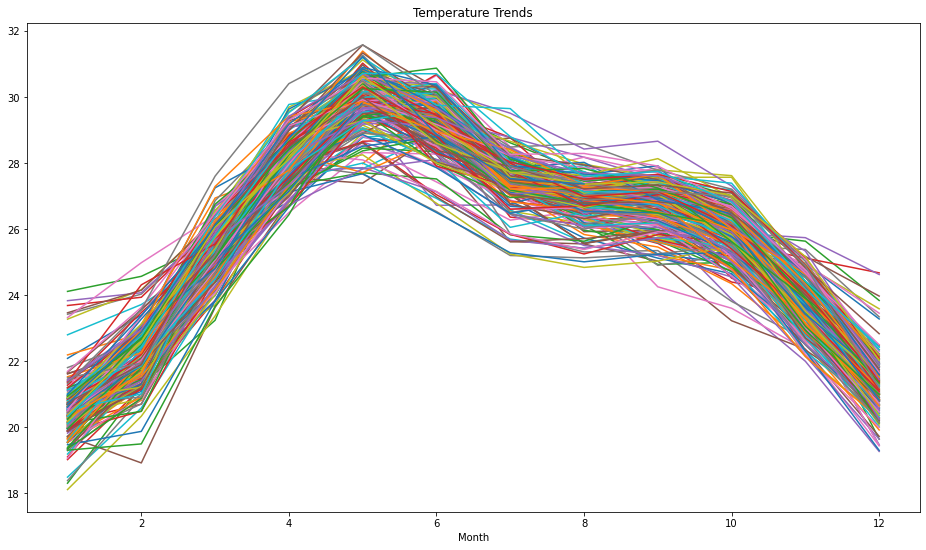

In [232]:
data.pivot_table(values='Temperature',index='Month',columns='Year').plot(figsize=(16,9),title="Temperature Trends")
plt.legend().remove()

In [233]:
# Seasonal Trend is visible

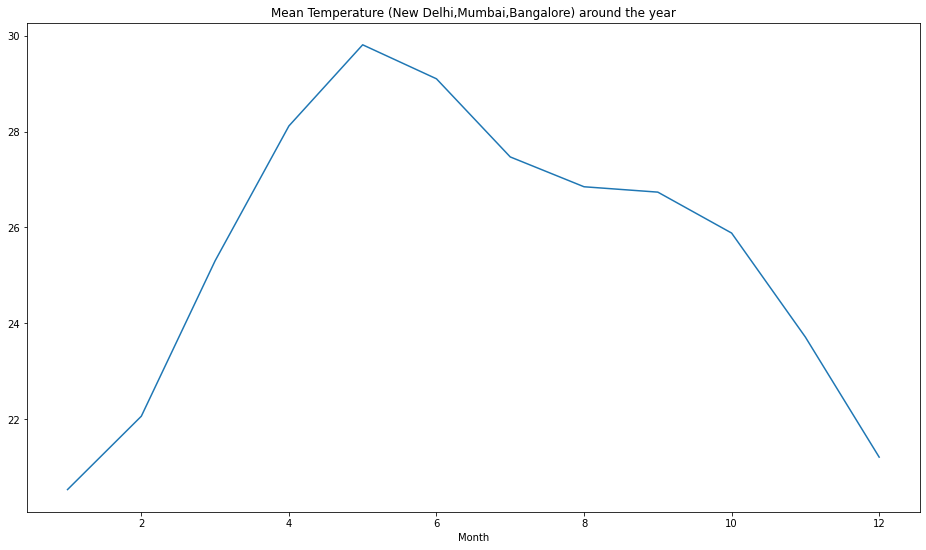

In [234]:
data.pivot_table(values='Temperature',index='Month',columns='Year').mean(axis=1).plot(figsize=(16,9),title="Mean Temperature (New Delhi,Mumbai,Bangalore) around the year")

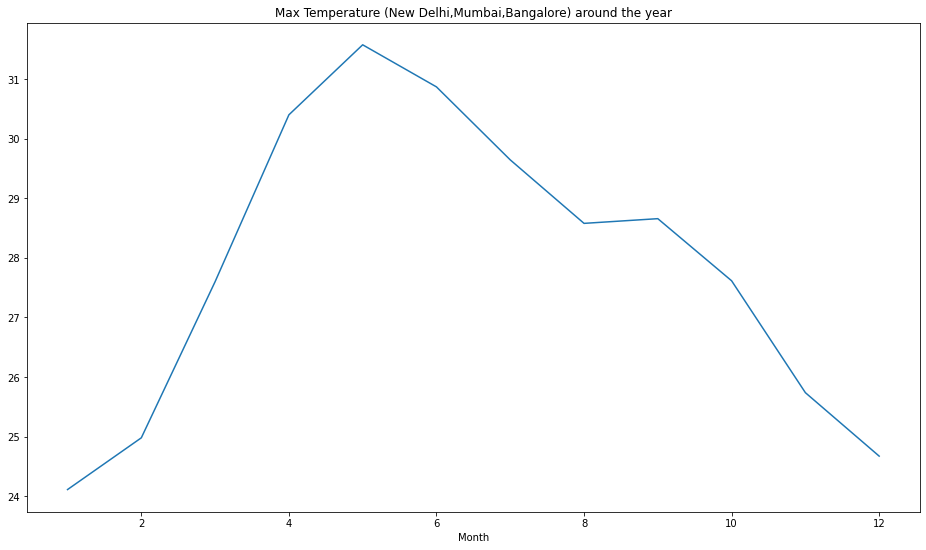

In [235]:
data.pivot_table(values='Temperature',index='Month',columns='Year').max(axis=1).plot(figsize=(16,9),title="Max Temperature (New Delhi,Mumbai,Bangalore) around the year")

##Moving Average Model on Time Series Data

In [237]:
dataf.head()

,Temperature,Month,Year,first_shift
Date,,,,
1797-03-01,26.766,3,1797,4.094
1797-04-01,27.448,4,1797,3.028
1797-05-01,27.554,5,1797,1.462
1797-06-01,26.768,6,1797,-0.919
1797-07-01,24.588,7,1797,-3.031


In [239]:
data2f=pd.DataFrame
data2f=dataf[['first_shift']]

In [240]:
data2f.columns=['Temperature_shift1']
data2f.head()

,Temperature_shift1
Date,
1797-03-01,4.094
1797-04-01,3.028
1797-05-01,1.462
1797-06-01,-0.919
1797-07-01,-3.031


In [242]:
data2f['Temperature_shift1'].isnull().sum()

0

In [244]:
rolling_shift=data2f['Temperature_shift1'].rolling(window=7).mean()
rolling_shift

Date
1797-03-01         NaN
1797-04-01         NaN
1797-05-01         NaN
1797-06-01         NaN
1797-07-01         NaN
                ...   
2013-04-01   -0.059000
2013-05-01    0.054286
2013-06-01   -0.217000
2013-07-01   -0.468143
2013-08-01   -0.466429
Name: Temperature_shift1, Length: 7398, dtype: float64

In [246]:
dataf['Rolling_temp']=rolling_shift
dataf

,Temperature,Month,Year,first_shift,Rolling_temp
Date,,,,,
1797-03-01,26.766,3,1797,4.094,NaN
1797-04-01,27.448,4,1797,3.028,NaN
1797-05-01,27.554,5,1797,1.462,NaN
1797-06-01,26.768,6,1797,-0.919,NaN
1797-07-01,24.588,7,1797,-3.031,NaN
...,...,...,...,...,...
2013-04-01,29.304,4,2013,-0.037,-0.059000
2013-05-01,34.746,5,2013,0.298,0.054286
2013-06-01,33.066,6,2013,-3.273,-0.217000


In [247]:
dataf=dataf.iloc[6:,:]
dataf.head()
dataf=dataf[['first_shift','Rolling_temp']]
dataf.head()

,first_shift,Rolling_temp
Date,,
1797-09-01,0.931,0.836143
1797-10-01,-0.640,0.159857
1797-11-01,-1.916,-0.546429
1797-12-01,-1.534,-0.974429
1798-01-01,-0.036,-0.848286


In [256]:
dataf.isnull().sum()
dataf.dtypes

first_shift     float64
Rolling_temp    float64
dtype: object

In [254]:
from sklearn.metrics import mean_squared_error

In [292]:
dataf.dropna(inplace=True)
err1=np.sqrt(mean_squared_error(dataf.first_shift,dataf.Rolling_temp))
err1

1.202395271863994

##ARIMA Model on Time Series Data

In [261]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

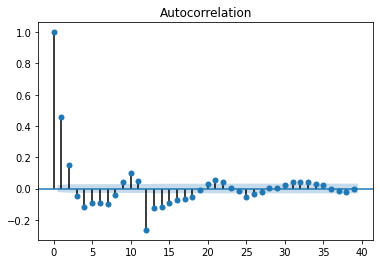

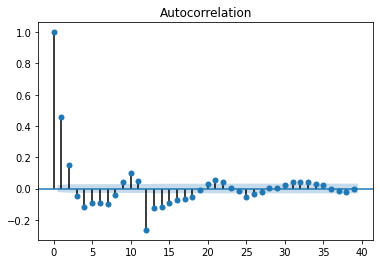

In [262]:
# Identifying ACF (Auto-Correlation Factor)

plot_acf(dataf['first_shift'].dropna())

In [ ]:
# (Closest to the boundary) q=9

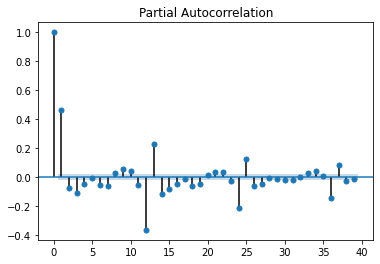

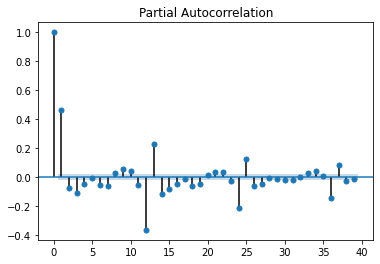

In [263]:
#Identifying PACF (Auto-Correlation Factor)
plot_pacf(dataf['first_shift'].dropna())

In [ ]:
#p=5

In [264]:
dt=dataf[['first_shift']]
dt.shape

(7392, 1)

In [266]:
# Defining training and testing data

X=dt[0:6000]
y=dt[6000:]

print(X," ",y)

            first_shift
Date                   
1797-09-01        0.931
1797-10-01       -0.640
1797-11-01       -1.916
1797-12-01       -1.534
1798-01-01       -0.036
...                 ...
1897-04-01       -1.597
1897-05-01       -0.032
1897-06-01        0.742
1897-07-01        0.180
1897-08-01       -0.436

[6000 rows x 1 columns]               first_shift
Date                   
1897-09-01       -0.625
1897-10-01       -1.029
1897-11-01       -0.104
1897-12-01        0.629
1898-01-01        1.005
...                 ...
2013-04-01       -0.037
2013-05-01        0.298
2013-06-01       -3.273
2013-07-01       -1.395
2013-08-01        0.067

[1392 rows x 1 columns]


In [268]:
from statsmodels.tsa.arima_model import ARIMA

In [277]:
arima=ARIMA(X,order=(5,0,9))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [278]:
model=arima.fit()

In [279]:
predictions=model.forecast(steps=len(y))[0]

In [293]:
err2=np.sqrt(mean_squared_error(y,predictions))
err2

1.4631933616175414

In [291]:
# import warnings
# warnings.filterwarnings("ignore")

# p_values = range(6)
# q_values = range(6)
# d_values = range(6)
# result= []
# for p in p_values:
#     for d in d_values:
#         for q in q_values:
#             order = (p,d,q)
#             try:
#                 arima =  ARIMA(X,order=order)
#                 model = arima.fit()
#                 predictions = model.forecast(steps=len(y))[0]
#                 error = np.sqrt(mean_squared_error(X,predictions))
#                 print("MSA : {} Order : {}".format(error,order))
#                 result.append((error,order))
#             except Exception as err:
#                 # print(err,"-->",order) 
#                 continue
                

In [296]:
data_viz = [['Moving Average Model', err1], ['ARIMA Model', err2]]
plot = pd.DataFrame(data_viz, columns = ['Model', 'MSE'])
plot

,Model,MSE
0,Moving Average Model,1.202395
1,ARIMA Model,1.463193


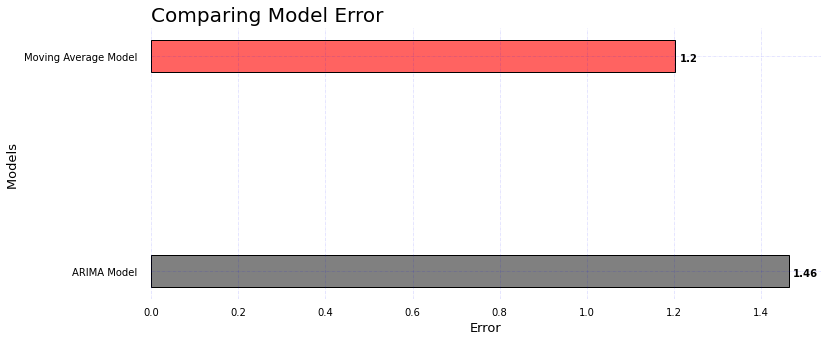

In [316]:
import pandas as pd
from matplotlib import pyplot as plt


# Figure Size
fig, ax = plt.subplots(figsize =(12, 5))

# Horizontal Bar Plot
ax.barh(plot['Model'], plot['MSE'],0.15,color=["#ff6361","Grey"] , edgecolor="Black")

# Removing axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='blue',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.01, i.get_y()+0.1,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='black')

# Add Plot Title
ax.set_title('Comparing Model Error ',
			loc ='left', fontsize=20)

plt.ylabel('Models ', fontsize=13)
plt.xlabel('Error', fontsize=13)

# Show Plot
plt.show()
